In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [5]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [6]:
# 인구현황.csv 로드하여 DataFrame 객체생성 , 변수명은 df_all 
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
print(df_all.head())

       행정기관코드   행정기관      총인구수       세대수  세대당 인구    남자 인구수    여자 인구수  남여 비율
0  1000000000     전국  51217221  24118928    2.12  25498324  25718897   0.99
1  1100000000  서울특별시   9331828   4482063    2.08   4505355   4826473   0.93
2  2600000000  부산광역시   3266598   1570403    2.08   1589912   1676686   0.95
3  2700000000  대구광역시   2363629   1104130    2.14   1159601   1204028   0.96
4  2800000000  인천광역시   3021010   1373827    2.20   1509243   1511767   1.00


In [7]:
# 전국 데이터는 제거하고 새로운 DataFrame 생성, 변수명은 df
df = df_all.loc[df_all['행정기관'] != '전국'].copy()
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [8]:
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64


##### 1. 지역별 총인구수 Top5


In [9]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all.loc[df_all['행정기관'] != '전국']

print("1. 지역별 총인구수 Top5")

top5 = df_all.groupby('행정기관')['총인구수'].sum().sort_values(ascending=False).head(5)

top5_df = top5.reset_index()
top5_df.columns = ['행정기관', '총인구수']
top5_df


1. 지역별 총인구수 Top5


,행정기관,총인구수
0,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
3,경상남도,3228380
4,인천광역시,3021010


##### 1-1. 지역별 총인구수 Plot

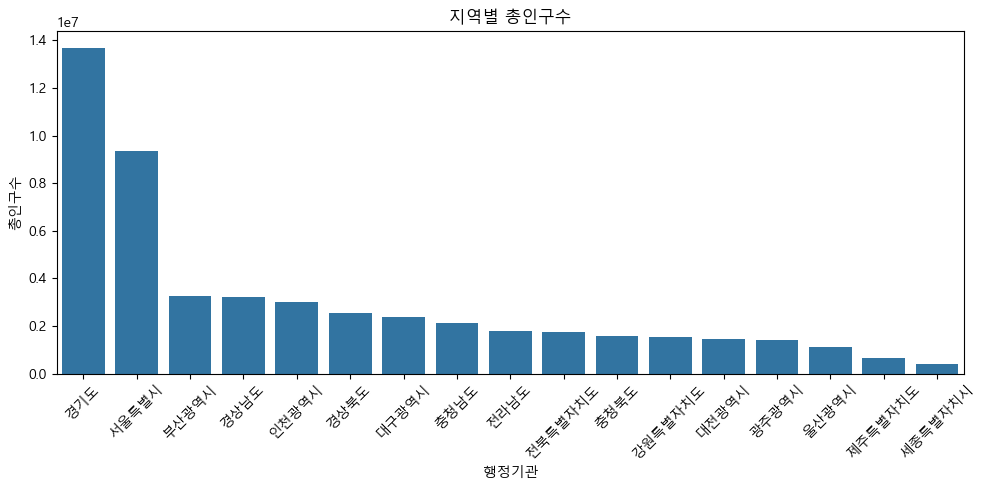

In [10]:
total_pop = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
total_pop = total_pop[total_pop['행정기관'] != '전국']
total_pop = total_pop.sort_values(by='총인구수', ascending=False)

plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(x='행정기관', y='총인구수', data=total_pop)

plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.show()

##### 2. 세대당 인구수 높은 지역 Top5

In [11]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all.loc[df_all['행정기관'] != '전국']

print("2. 세대당 인구수 높은 지역 Top5")

top5 = df_all.groupby('행정기관')['세대당 인구'].sum().sort_values(ascending=False).head(5)

top5_df = top5.reset_index()
top5_df.columns = ['행정기관', '세대당 인구']
top5_df



2. 세대당 인구수 높은 지역 Top5


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,광주광역시,2.14


##### 2-1. 지역별 세대당 인구 Plot

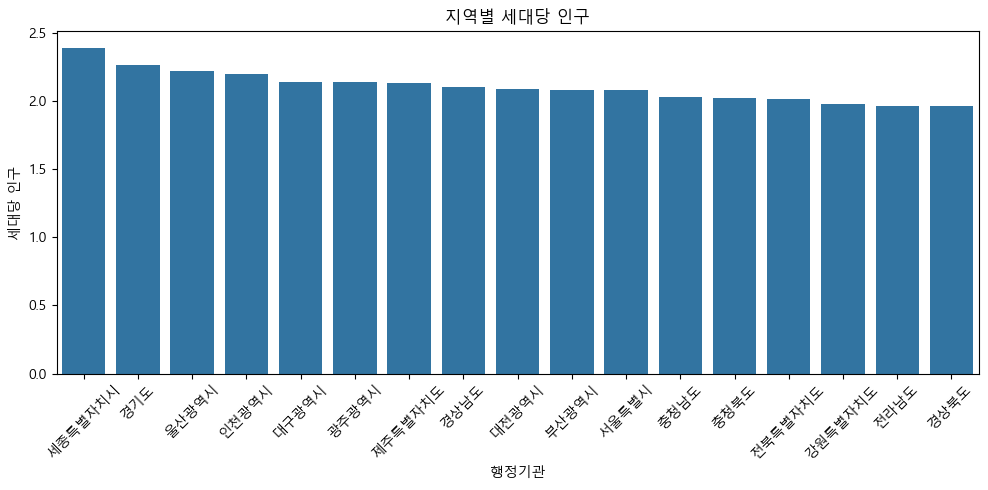

In [12]:
total_pop = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
total_pop = total_pop[total_pop['행정기관'] != '전국']
total_pop = total_pop.sort_values(by='세대당 인구', ascending=False)

plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(x='행정기관', y='세대당 인구', data=total_pop)

plt.xticks(rotation=45)
plt.title('지역별 세대당 인구')
plt.tight_layout()
plt.show()


##### 3. 남녀 비율 분석

In [13]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all.loc[df_all['행정기관'] != '전국']

print("3. 남녀 비율 분석")

top = df_all.groupby('행정기관')['남여 비율'].sum().sort_values(ascending=False)

top_df = top.reset_index()
top_df.columns = ['행정기관', '남여 비율']
top_df

3. 남녀 비율 분석


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,인천광역시,1.00
9,제주특별자치도,1.00


##### 3-1. 지역별 남녀 비율 Plot
* 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요. (선택)

In [14]:
plt.figure(figsize=(10,5))



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

##### 4. 남자초과 / 여자초과 분석
* 남초(남자초과) => 남자 인구가 여자 인구보다 많은 지역	남여 비율 > 1 또는 남자 인구수 > 여자 인구수
* 여초(여자초과) => 여자 인구가 남자 인구보다 많은 지역	남여 비율 < 1 또는 여자 인구수 > 남자 인구수

* 남초여초 컬럼을 추가합니다. 

In [15]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all.loc[df_all['행정기관'] != '전국']


print("4. 남초 vs 여초 지역 구분")

top = df_all.groupby('행정기관', sort=False)['남여 비율'].mean()

top_df = top.reset_index()
top_df.columns = ['행정기관', '남여 비율']

top_df['성비 구분'] = top_df['남여 비율'].apply(lambda x: '남초' if x > 1.00 else '여초')

top_df

4. 남초 vs 여초 지역 구분


,행정기관,남여 비율,성비 구분
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,여초
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초


##### 5. 세대당 인구 평균보다 높은 지역

In [16]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all.loc[df_all['행정기관'] != '전국']

print("5. 세대당 인구 평균보다 높은 지역")

top = df_all.groupby('행정기관')['세대당 인구'].sum().sort_values(ascending=False)

top_df = top.reset_index()
top_df.columns = ['행정기관', '세대당 인구']
top_df

5. 세대당 인구 평균보다 높은 지역


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,광주광역시,2.14
5,대구광역시,2.14
6,제주특별자치도,2.13
7,경상남도,2.10
8,대전광역시,2.09
9,서울특별시,2.08


##### 5-1. 남초 vs 여초 개수 Plot  /  지역별 세대수 Plot

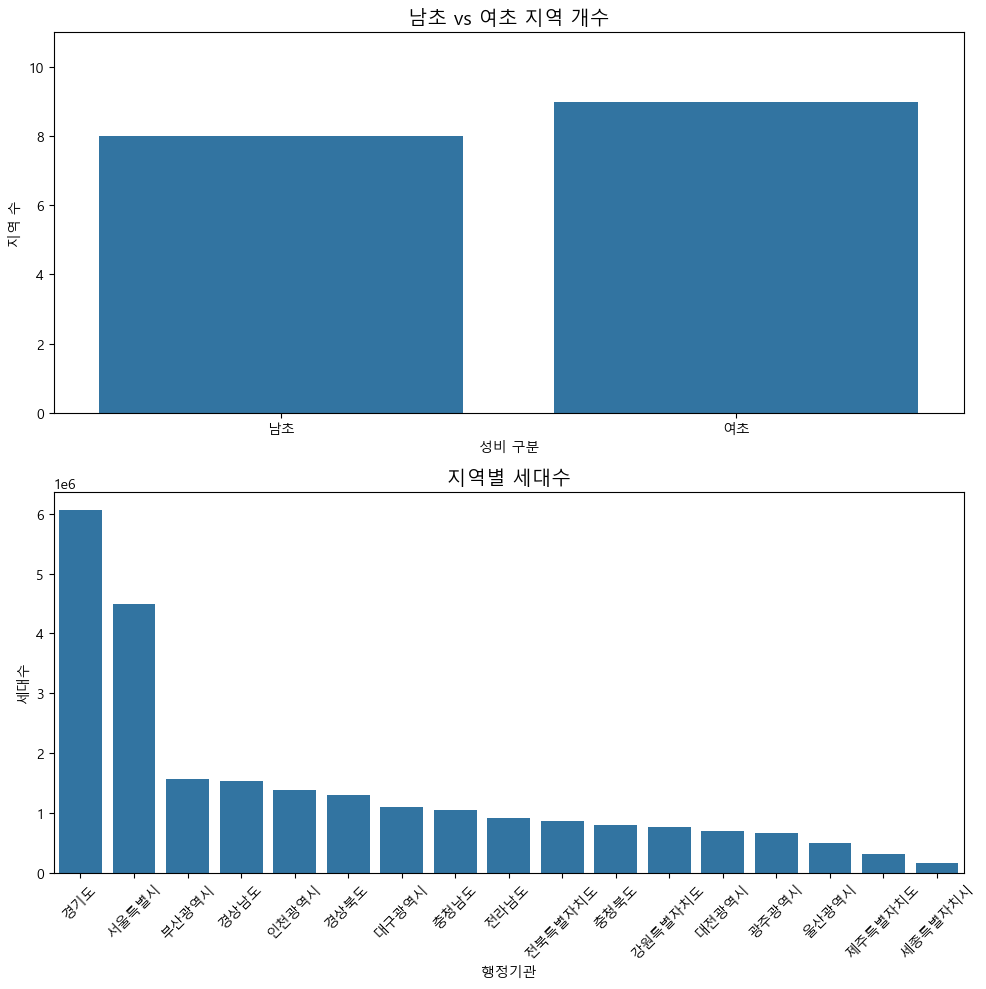

In [ ]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all[df_all['행정기관'] != '전국']

top = df_all.groupby('행정기관', sort=False)['남여 비율'].mean()
top_df = top.reset_index()
top_df.columns = ['행정기관', '남여 비율']
top_df['성비 구분'] = top_df['남여 비율'].apply(lambda x: '남초' if x > 1.00 else '여초')

total_pop = df_all.copy()
total_pop = total_pop.sort_values(by='세대수', ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.countplot(data=top_df, x='성비 구분', order=['남초', '여초'], ax=axs[0])
axs[0].set_title('남초 vs 여초 지역 개수', fontsize=14)
axs[0].set_xlabel('성비 구분')
axs[0].set_ylabel('지역 수')
axs[0].set_ylim(0, top_df['성비 구분'].value_counts().max() + 2)

sns.barplot(x='행정기관', y='세대수', data=total_pop, ax=axs[1])
axs[1].set_title('지역별 세대수', fontsize=14)
axs[1].set_xlabel('행정기관')
axs[1].set_ylabel('세대수')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### 6. 남자 인구 vs 여자 인구 비교 Plot(선택)

### 엑셀 리포트 자동 생성 코드

In [19]:
# 엑셀 저장용
from pandas import ExcelWriter
import datetime

# 분석 데이터 준비
top5_population = df[['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head(5)
top5_family = df[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).head(5)
male_vs_female = df[['행정기관', '남자 인구수', '여자 인구수']]

# 남초/여초 컬럼 추가
df['남초여초'] = df['남여 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))

today = datetime.datetime.now().strftime('%Y%m%d')
filename = f'data/인구분석리포트_{today}.xlsx'

# Excel 파일로 저장
with ExcelWriter(filename, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='원본데이터', index=False)
    top5_population.to_excel(writer, sheet_name='총인구 Top5', index=False)
    top5_family.to_excel(writer, sheet_name='세대당 인구 Top5', index=False)
    male_vs_female.to_excel(writer, sheet_name='남자vs여자', index=False)
    
print("엑셀 리포트 저장 완료 → '인구분석리포트.xlsx'")


엑셀 리포트 저장 완료 → '인구분석리포트.xlsx'


In [20]:
# 남녀 인구 차이 컬럼 추가
df['남여차이'] = abs(df['남자 인구수'] - df['여자 인구수'])

# 남녀 비율 TOP5 (남초)
male_dom = df.sort_values(by='남여 비율', ascending=False).head(5)

# 남녀 비율 TOP5 (여초)
female_dom = df.sort_values(by='남여 비율', ascending=True).head(5)

# 세대당 인구 TOP5 (가구당 인구 많은 지역)
big_family = df.sort_values(by='세대당 인구', ascending=False).head(5)

# 세대수 대비 총인구 비율
df['인구/세대'] = df['총인구수'] / df['세대수']

# 수도권 vs 비수도권 비교
capital = df[df['행정기관'].isin(['서울특별시', '경기도', '인천광역시'])]
non_capital = df[~df['행정기관'].isin(['서울특별시', '경기도', '인천광역시'])]


In [21]:

print("남초 TOP5")
male_dom[['행정기관','남여 비율']].reset_index(drop=True)


남초 TOP5


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02


In [22]:

print("여초 TOP5")
female_dom[['행정기관','남여 비율']].reset_index(drop=True)


여초 TOP5


,행정기관,남여 비율
0,서울특별시,0.93
1,부산광역시,0.95
2,대구광역시,0.96
3,광주광역시,0.97
4,전북특별자치도,0.99


In [23]:

print("세대당 인구 많은 TOP5")
big_family[['행정기관','세대당 인구']].reset_index(drop=True)


세대당 인구 많은 TOP5


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


In [24]:

print("수도권 평균 세대당 인구:", capital['세대당 인구'].mean())
print("비수도권 평균 세대당 인구:", non_capital['세대당 인구'].mean())

수도권 평균 세대당 인구: 2.18
비수도권 평균 세대당 인구: 2.0892857142857144


In [25]:
# 전국 총인구수
total_population = df_all[df_all['행정기관'] == '전국']['총인구수'].values[0]

# 인구비율(%) 컬럼 추가하기
df['인구비율(%)'] = df['총인구수'] / total_population * 100

df

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# 전국 제외
df_plot = df.sort_values(by='인구비율(%)', ascending=False)
df_plot

KeyError: '인구비율(%)'

In [ ]:

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(df_plot['행정기관'], df_plot['인구비율(%)'], color='cornflowerblue')

plt.xlabel('인구비율 (%)')
plt.title('행정기관별 인구 비율')

# 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}%", va='center')

plt.gca().invert_yaxis()
plt.show()

NameError: name 'df_plot' is not defined

<Figure size 1200x800 with 0 Axes>